# Non linear programing

Generate random data, at least m=1000 observations, from a predefined linear regression model with at least n=100 variables. Assume that the regression coefficients 𝜷=(𝛽1,…,𝛽𝑖,…,𝛽𝑛) are integers where: −5≤𝛽𝑖≤5 ∀𝑖. Assume also normal residuals (𝑒~𝑁(0,𝜎)).

In [3]:
import numpy as np

m = 1000 ;
n = 100;
sigma = 10; # Only a first value

X0 = np.ones([m,1])
#np.random.seed(0)
X1 = np.random.uniform(0,10, ([m,n]))
X = np.concatenate([X0,X1],axis = 1)
np.savetxt("VariableX.txt",X)
error = np.random.normal (0,sigma,(m,1))
beta = np.random.randint(-5, 5, size= ([n+1,1]))
Y = np.dot(X,beta)+error
np.savetxt("VariableY.txt",Y)
#print(beta)

a) Estimate the value of the regression coefficients by using the analytical solution for the least squares estimation problem.

In [4]:
beta_ls = np.dot(np.dot(np.linalg.inv(np.dot(np.transpose(X),X)),np.transpose(X)),Y)
print(beta_ls)

[[-12.80148123]
 [  2.02315799]
 [ -2.83327817]
 [  1.10931473]
 [ -4.00819808]
 [  3.21362022]
 [ -2.80823993]
 [ -3.15944649]
 [ -1.82769344]
 [ -0.03478562]
 [  3.07342417]
 [  2.10272571]
 [  3.21230504]
 [ -0.98493778]
 [ -2.92192449]
 [  4.00635617]
 [ -4.14285432]
 [ -1.70654683]
 [  3.96672877]
 [  4.06179884]
 [ -3.94814221]
 [  3.98089193]
 [  1.0521138 ]
 [  0.1321263 ]
 [ -1.0493243 ]
 [  2.09933889]
 [  0.79615279]
 [  1.89999252]
 [ -1.90755422]
 [ -4.24067259]
 [  3.88943055]
 [ -3.0990061 ]
 [ -4.14332935]
 [ -3.00697585]
 [  2.95442801]
 [ -3.05961079]
 [  0.86957953]
 [  0.95713132]
 [ -4.03168188]
 [ -3.84221915]
 [ -2.04394447]
 [  0.04496062]
 [  0.12712519]
 [  2.04347987]
 [ -4.00887338]
 [ -2.01530972]
 [ -4.98352612]
 [  1.06935986]
 [ -1.97742574]
 [  3.95021791]
 [ -3.92781882]
 [  3.91865661]
 [ -3.10784065]
 [  1.02420172]
 [  2.11132248]
 [  2.04151894]
 [ -4.82423611]
 [  4.07516065]
 [ -3.97528029]
 [ -2.99810971]
 [ -2.13874614]
 [  2.2176153 ]
 [ -0.02

b) Let 𝜷̂=(𝛽̂1,…,𝛽̂𝑖,…,𝛽̂𝑛) be the coefficient' estimations obtained in a) and 𝜷=(𝛽1,…,𝛽𝑖,…,𝛽𝑛) be their real value used to generate the data. We can define a measure 𝜆 of the estimation error as:

𝜆=$\frac{‖𝜷−𝜷̂‖}{‖𝜷‖}×100$

Analyze how the estimation error (𝜆) varies with 𝜎 (standard deviation assumed for the residuals). Make use of a graph to illustrate this relationship.

In [5]:
#DECLARE LIST THAT WILL LAMBDA VALUES
EstimError= [];

#DEFINE RANGE FOR SIGMA
sigma_values = np.arange(0.5,10000, 20) #from 0.5 to 30 in steps of 0.25

for sigma in sigma_values:
    Aux_error = np.random.normal (0,sigma,(m,1)) #generate error with normal distribution
    Y_aux = np.dot(X,beta)+Aux_error                 #generate new prediction
    beta_ls_aux = np.dot(np.dot(np.linalg.inv(np.dot(np.transpose(X),X)),
                            np.transpose(X)),Y_aux) #Estimate Betas using LSE
    #Use 2-norm to estimate the error
    EstimError.append(np.linalg.norm(np.matrix(beta)-beta_ls_aux,2)/np.linalg.norm(beta,2)*100) 
    


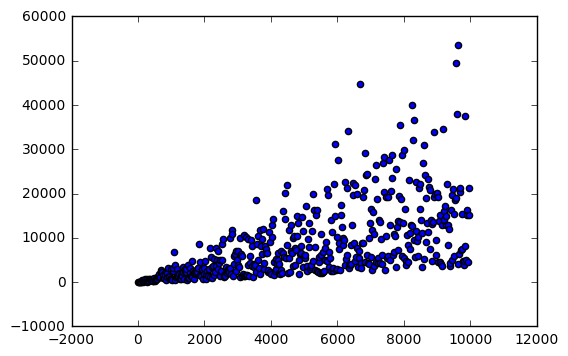

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(sigma_values,EstimError)

c) Estimate the value of the regression coefficients (least squares) by using the tool minimize from the python package Scipy.optimize. Try at least three available solvers and compare their performance (iterations, function, gradient and hessian evaluations as well as total computational time).

### SLSQP Solver

In [7]:
from scipy.optimize import minimize
import time

# Defining the function to minimize
def squares(beta,X, Y):
    return sum((Y[i]-np.dot(beta,X[i,].T))**2 for i in range(0,m)) 

#Create bounds (-5,5)
bnds = []
for i in range(0,n+1):
    bnds.append((-5,5))
    
#Initial State of the Betas
beta0 = np.zeros(n+1) #Initial state 

#************** SLSQP SOLVER **********************************
start = time.time()
beta_SLSQP = minimize(squares,
                  beta0,
                  args=(X, Y),
                  method='SLSQP',
                  bounds=bnds,
                  options={'disp': False,'ftol': 1e-15})
end = time.time()

In [8]:
#Print Results
print '\nExecution time of SLSQP is: {0:.4f}'.format(end - start)
print 'Number of iterations: {0}'.format(beta_SLSQP.nit)
print 'Number of evaluations of Obj. Function: {0}'.format(beta_SLSQP.nfev)
print 'Final value of Obj. Function: {0!s}'.format(beta_SLSQP.fun)
if 'njev' in beta_SLSQP.keys():
    print 'Number of evaluations of Gradient: {0}'.format(beta_SLSQP.njev)
else:
    print 'Gradient not used' 

if 'nhev' in beta_SLSQP.keys():
    print 'Number of evaluations of Hessian: {0}'.format(beta_SLSQP.nhev)
else:
    print 'Hessian not used' 
print 'error = {0:.4f}'.format(np.linalg.norm(np.matrix(beta)-np.transpose(np.matrix(beta_SLSQP.x)),2)/np.linalg.norm(beta,2)*100)




Execution time of SLSQP is: 1.4216
Number of iterations: 5
Number of evaluations of Obj. Function: 103
Final value of Obj. Function: [  1.24581386e+08]
Number of evaluations of Gradient: 1
Hessian not used
error = 100.0000


### L-BFGS-B Solver

In [9]:
#************** L-BFGS-B SOLVER **********************************
start = time.time()
beta_LBFGSB = minimize(squares,
                  beta0,
                  args=(X, Y),
                  method='L-BFGS-B',
                  bounds=bnds,
                  options={'disp': False,'ftol': 1e-15})
end = time.time()

KeyboardInterrupt: 

In [10]:
#Print Results
print '\nExecution time of L-BFGS-B is: {0:.4f}'.format(end - start)
print 'Number of iterations: {0}'.format(beta_LBFGSB.nit)
print 'Number of evaluations of Obj. Function: {0}'.format(beta_LBFGSB.nfev)
print 'Final value of Obj. Function: {0!s}'.format(beta_LBFGSB.fun)
if 'njev' in beta_LBFGSB.keys():
    print 'Number of evaluations of Gradient: {0}'.format(beta_LBFGSB.njev)
else:
    print 'Gradient not used' 

if 'nhev' in beta_LBFGSB.keys():
    print 'Number of evaluations of Hessian: {0}'.format(beta_LBFGSB.nhev)
else:
    print 'Hessian not used'  
print 'error = {0:.4f}'.format(np.linalg.norm(np.matrix(beta)-np.transpose(np.matrix(beta_LBFGSB.x)),2)/np.linalg.norm(beta,2)*100)



Execution time of L-BFGS-B is: -51.1648


NameError: name 'beta_LBFGSB' is not defined

### TNC Solver

In [ ]:
#************** TNC SOLVER **********************************
start = time.time()
beta_TNC = minimize(squares,
                  beta0,
                  args=(X, Y),
                  method='TNC',
                  bounds=bnds,
                  options={'disp': False,'ftol': 1e-15})
end = time.time()

In [31]:
#Print Results
print '\nExecution time of L-BFGS-B is: {0:.4f}'.format(end - start)
print 'Number of iterations: {0}'.format(beta_TNC.nit)
print 'Number of evaluations of Obj. Function: {0}'.format(beta_TNC.nfev)
print 'Final value of Obj. Function: {0!s}'.format(beta_TNC.fun)
if 'njev' in beta_TNC.keys():
    print 'Number of evaluations of Gradient: {0}'.format(beta_TNC.njev)
else:
    print 'Gradient not used' 

if 'nhev' in beta_TNC.keys():
    print 'Number of evaluations of Hessian: {0}'.format(beta_TNC.nhev)
else:
    print 'Hessian not used'  
print 'error = {0:.4f}'.format(np.linalg.norm(np.matrix(beta)-np.transpose(np.matrix(beta_TNC.x)),2)/np.linalg.norm(beta,2)*100)



Execution time of L-BFGS-B is: 315.4010
Number of iterations: 101
Number of evaluations of Obj. Function: 1010
Final value of Obj. Function: [ 248210.01265036]
Gradient not used
Hessian not used
error = 22.9045


d) Considering again the least squares estimation problem, estimate the value of the regression coefficients
by implementing the:


$\rightarrow$ Definition objective function, gradient and Hessian

In [11]:
#definitinition of OF
def least_sq_reg(beta_ls, X, Y):
    beta_ls=np.matrix(beta_ls)
    z=Y-X*np.transpose(beta_ls)
    return np.transpose(z)*z

#definition of Gradient
def least_sq_reg_der(beta_ls,X,Y):
    beta_ls=np.matrix(beta_ls)
    pp=-2*np.transpose(Y-X*np.transpose(beta_ls))*X
    aa= np.squeeze(np.asarray(pp))
    return aa

#definition of hessian
def least_sq_reg_hess(beta_ls,X,Y):
    ss=2*np.dot(np.transpose(X),X)
    return ss

### Gradient

In [12]:
(a,b)=X.shape
beta_lsg=np.zeros(b) #initial value for beta
n_iter=100000 #maximim nunber iteration
OF_iter=np.zeros(n_iter)
tol_iter=np.zeros(n_iter)
alpha_iter=np.zeros(n_iter)
i=0;
tol=1000;
epsilon=1e-3;

time_start = time.clock()
while (i <= n_iter-2) and (tol>epsilon):
    i=i+1
    grad = least_sq_reg_der(beta_lsg,X,Y)
    ddirect = - grad
    ###################################
    #      Armijo Rule-----Choose an appropiate alpha
    sigma = 0.1
    beta_half = 0.5
    alpha = 1
    while (least_sq_reg(beta_lsg + alpha*ddirect , X, Y)> least_sq_reg(beta_lsg, X, Y) + alpha*sigma*np.dot(grad,ddirect)):
        alpha = alpha*beta_half
    ###################################
    beta_lsg = beta_lsg + alpha*ddirect
    OF_iter[i] = least_sq_reg(beta_lsg, X, Y)
    tol = np.linalg.norm(grad,ord=2)
    tol_iter[i] = tol
    alpha_iter[i] = alpha
time_elapsed = (time.clock() - time_start)     

In [13]:
#Print Results
print '\nExecution time of Gradient Method is: {0:.4f}'.format(time_elapsed)
print 'Number of iterations: {0}'.format(i)
print 'Number of evaluations of Obj. Function: {0}'.format(i)
print 'Final value of Obj. Function: {0:4f}'.format(OF_iter[i])
print 'Number of evaluations of Gradient: {0}'.format(i)
print 'Hessian not used'
print 'error = {0:.4f}'.format(np.linalg.norm(np.matrix(beta)-np.transpose(np.matrix(beta_lsg)),2)/np.linalg.norm(beta,2)*100)



Execution time of Gradient Method is: 180.9180
Number of iterations: 99999
Number of evaluations of Obj. Function: 99999
Final value of Obj. Function: 85442.060907
Number of evaluations of Gradient: 99999
Hessian not used
error = 15.0492


### Newton

In [14]:
(a,b)=X.shape
beta_newton=np.zeros(b) #initial value for beta
n_iter=100000 #maximim nunber iteration
OF_iter=np.zeros(n_iter)
tol_iter=np.zeros(n_iter)
alpha_iter=np.zeros(n_iter)
alpha_iter=np.zeros(n_iter)
i=0;
tol=1000;
epsilon=1e-8;

time_start = time.clock()
while (i <= n_iter-2) and (tol>epsilon):
    i=i+1
    grad = least_sq_reg_der(beta_newton,X,Y)
    hess = least_sq_reg_hess(beta_newton,X,Y)
    ddirect = - np.dot(np.linalg.inv(hess),grad)
    ###################################
    #      Armijo Rule-----Choose an appropiate alpha
    sigma = 0.1
    beta_half = 0.5
    alpha = 1
    while (least_sq_reg(beta_newton + alpha*ddirect , X, Y)> least_sq_reg(beta_newton, X, Y) + alpha*sigma*np.dot(grad,ddirect)):
        alpha = alpha*beta_half
    ###################################
    beta_newton = beta_newton + alpha*ddirect
    OF_iter[i] = least_sq_reg(beta_newton, X, Y)
    tol = np.linalg.norm(grad,ord=2)
    tol_iter[i] = tol
    alpha_iter[i] = alpha
time_elapsed = (time.clock() - time_start)

In [15]:
#Print Results
print '\nExecution time of Newton Method is: {0:.4f}'.format(time_elapsed)
print 'Number of iterations: {0}'.format(i)
print 'Number of evaluations of Obj. Function: {0}'.format(i)
print 'Final value of Obj. Function: {0:4f}'.format(OF_iter[i])
print 'Number of evaluations of Gradient: {0}'.format(i)
print 'Number of evaluations of Hessian: {0}'.format(i)
print 'error = {0:.4f}'.format(np.linalg.norm(np.matrix(beta)-np.transpose(np.matrix(beta_newton)),2)/np.linalg.norm(beta,2)*100)


Execution time of Newton Method is: 0.0032
Number of iterations: 3
Number of evaluations of Obj. Function: 3
Final value of Obj. Function: 85441.836378
Number of evaluations of Gradient: 3
Number of evaluations of Hessian: 3
error = 15.9964


### Quasi-Newton

In [16]:
(a,b)=X.shape
beta_quasi=np.zeros(b) #initial value for beta
n_iter=100000 #maximim nunber iteration
OF_iter=np.zeros(n_iter)
tol_iter=np.zeros(n_iter)
alpha_iter=np.zeros(n_iter)
alpha_iter=np.zeros(n_iter)
i=0;
tol=1000;
epsilon=1e-8;

time_start = time.clock()
while (i <= n_iter-2) and (tol>epsilon):
    i=i+1
    grad = least_sq_reg_der(beta_quasi,X,Y)
    if (i==1):
        grad = least_sq_reg_der(beta_quasi,X,Y)
        B = least_sq_reg_hess(beta_quasi,X,Y)
    else:
        grad_before = grad
        grad = least_sq_reg_der(beta_quasi,X,Y)
        y = grad - grad_before
        s = beta_quasi - beta_quasi_before
        B_before = B
        B = B_before + np.dot(y-np.dot(B,s),np.transpose(y-np.dot(B,s)))/(np.dot(np.transpose(y-np.dot(B,s)),s))
    ddirect = - np.dot(np.linalg.inv(B),grad)
    ###################################
    #      Armijo Rule-----Choose an appropiate alpha
    sigma = 0.1
    beta_half = 0.5
    alpha = 1
    while (least_sq_reg(beta_quasi + alpha*ddirect , X, Y)> least_sq_reg(beta_quasi, X, Y) + alpha*sigma*np.dot(grad,ddirect)):
        alpha = alpha*beta_half
    ###################################
    beta_quasi_before = beta_quasi
    beta_quasi = beta_quasi_before + alpha*ddirect
    OF_iter[i] = least_sq_reg(beta_quasi, X, Y)
    tol = np.linalg.norm(grad,ord=2)
    tol_iter[i] = tol
    alpha_iter[i] = alpha   
time_elapsed = (time.clock() - time_start)

In [17]:
#Print Results
print '\nExecution time of Quasi-Newton Method is: {0:.4f}'.format(time_elapsed)
print 'Number of iterations: {0}'.format(i)
print 'Number of evaluations of Obj. Function: {0}'.format(i)
print 'Final value of Obj. Function: {0:4f}'.format(OF_iter[i])
print 'Number of evaluations of Gradient: {0}'.format(i)
print 'Number of evaluations of Hessian: {0}'.format(1)
print 'error = {0:.4f}'.format(np.linalg.norm(np.matrix(beta)-np.transpose(np.matrix(beta_quasi)),2)/np.linalg.norm(beta,2)*100)


Execution time of Quasi-Newton Method is: 0.0032
Number of iterations: 3
Number of evaluations of Obj. Function: 3
Final value of Obj. Function: 85441.836378
Number of evaluations of Gradient: 3
Number of evaluations of Hessian: 1
error = 15.9964


d) Estimate the value of the regression coefficients y implementing the coordinate gradient method and the stochastic gradient method. Compare their performance with the algorithms in c).

### Coordinate gradient

In [13]:
import random 
(a,b)=X.shape
#alpha = 0.00001
beta_coor=np.zeros(b) #initial value for beta
n_iter=100000 #maximim nunber iteration
OF_iter=np.zeros(n_iter)
tol_iter=np.zeros(n_iter)
alpha_iter=np.zeros(n_iter)
i=0;
tol=1000;
epsilon=1e-3;

time_start = time.clock()
while (i <= n_iter-2) and (tol>epsilon):
    i=i+1
    grad = least_sq_reg_der(beta_coor,X,Y)
    ddirect =np.zeros(b)
    j = random.randint(0, b-1)
    ddirect[j] = - grad[j]
    ###################################
    #      Armijo Rule-----Choose an appropiate alpha
    sigma = 0.1
    beta_half = 0.5
    alpha = 1
    while (least_sq_reg(beta_coor + alpha*ddirect , X, Y)> least_sq_reg(beta_coor, X, Y) + alpha*sigma*np.dot(grad,ddirect)):
          alpha = alpha*beta_half
    ###################################
    beta_coor = beta_coor + alpha*ddirect
    OF_iter[i] = least_sq_reg(beta_coor, X, Y)
    tol = np.linalg.norm(grad,ord=2)
    tol_iter[i] = tol
    alpha_iter[i] = alpha

time_elapsed = (time.clock() - time_start) 

In [19]:
#Print Results
print '\nExecution time of Coordinate Gradient Method is: {0:.4f}'.format(time_elapsed)
print 'Number of iterations: {0}'.format(i)
print 'Number of evaluations of Obj. Function: {0}'.format(i)
print 'Final value of Obj. Function: {0:4f}'.format(OF_iter[i])
print 'Number of evaluations of Gradient: {0}'.format(i)
print 'Hessian not used'
print 'error = {0:.4f}'.format(np.linalg.norm(np.matrix(beta)-np.transpose(np.matrix(beta_coor)),2)/np.linalg.norm(beta,2)*100)



Execution time of Coordinate Gradient Method is: 130.7382
Number of iterations: 99999
Number of evaluations of Obj. Function: 99999
Final value of Obj. Function: 85441.845101
Number of evaluations of Gradient: 99999
Hessian not used
error = 15.8094


### Stochastic gradient

In [20]:
#definition of partial gradient 
def least_sq_reg_der_par(beta_ls,X,Y,i):
    beta_ls=np.matrix(beta_ls)
    pp=-2*(Y[i]-X[i,]*np.transpose(beta_ls))*X[i,]
    aa= np.squeeze(np.asarray(pp))
    return aa

In [27]:
import time
import random
(a,b)=X.shape
#alpha = 0.0001
beta_sto=np.zeros(b) #initial value for beta
n_iter=100000 #maximum nunber iteration
OF_iter=np.zeros(n_iter)
tol_iter=np.zeros(n_iter)
alpha_iter=np.zeros(n_iter)
i=0;
tol=1000;
epsilon=1e-3;

time_start = time.clock()
while (i <= n_iter-2) and (tol>epsilon):
    i=i+1
    j = random.randint(0, b-1)
    grad_par = least_sq_reg_der_par(beta_sto,X,Y,j)
    grad = least_sq_reg_der(beta_sto,X,Y)
    ddirect = - grad_par
    ###################################
    #      Armijo Rule-----Choose an appropiate alpha
    sigma = 0.1
    beta_half = 0.5
    alpha = 1
    while (least_sq_reg(beta_sto + alpha*ddirect , X, Y)> least_sq_reg(beta_sto, X, Y) + alpha*sigma*np.dot(grad,ddirect)):
           alpha = alpha*beta_half
    ###################################
    beta_sto = beta_sto + ddirect*alpha
    OF_iter[i] = least_sq_reg(beta_sto, X, Y)
    tol = np.linalg.norm(grad,ord=2)
    tol_iter[i] = tol
    alpha_iter[i] = alpha
time_elapsed = (time.clock() - time_start) 

In [32]:
#Print Results
print '\nExecution time of Stochastic Gradient Method is: {0:.4f}'.format(time_elapsed)
print 'Number of iterations: {0}'.format(i)
print 'Number of evaluations of Obj. Function: {0}'.format(i)
print 'Final value of Obj. Function: {0:4f}'.format(OF_iter[i])
print 'Number of evaluations of Gradient: {0}'.format(i)
print 'Hessian not used'
print 'error = {0:.4f}'.format(np.linalg.norm(np.matrix(beta)-np.transpose(np.matrix(beta_sto)),2)/np.linalg.norm(beta,2)*100)



Execution time of Stochastic Gradient Method is: 257.0573
Number of iterations: 99999
Number of evaluations of Obj. Function: 99999
Final value of Obj. Function: 1834117.258382
Number of evaluations of Gradient: 99999
Hessian not used
error = 56.4157


In [29]:
print(least_sq_reg(beta_sto, X, Y))

[[ 1834117.25838171]]
